In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
from pathlib import Path
from shapely.geometry import Point, LineString
from pprint import pprint
from matplotlib import animation

import hydromt
from hydromt.log import setuplog
from hydromt_sfincs import SfincsModel, utils

logger = setuplog("prepare data catalog", log_level=10)

2024-04-11 09:18:39,422 - prepare data catalog - log - INFO - HydroMT version: 0.9.4


In [2]:
data_libs = [
    Path(r"data/1_static/data_static_tana.yml"),
    Path(r"data/2_forcing/data_forcing.yml"),
]
model_root = Path(r"model/base_garissa")

data_catalog = hydromt.DataCatalog(data_libs=data_libs, logger=logger)

model = SfincsModel(root=model_root, data_libs=data_libs, mode="w+", logger=logger)

2024-04-11 09:18:41,371 - prepare data catalog - data_catalog - INFO - Parsing data catalog from data\1_static\data_static_tana.yml
2024-04-11 09:18:41,400 - prepare data catalog - data_catalog - INFO - Parsing data catalog from data\2_forcing\data_forcing.yml
2024-04-11 09:18:41,484 - prepare data catalog - data_catalog - INFO - Parsing data catalog from data\1_static\data_static_tana.yml
2024-04-11 09:18:41,501 - prepare data catalog - data_catalog - INFO - Parsing data catalog from data\2_forcing\data_forcing.yml
2024-04-11 09:18:41,504 - prepare data catalog - log - DEBUG - Appending log messages to file c:\Users\pjdeb\OneDrive\Documenten\Universiteit\CT 5\MDP\Git\MDP\SFINCS\model\base_garissa\hydromt.log.
2024-04-11 09:18:41,505 - prepare data catalog - model_api - INFO - Initializing sfincs model from hydromt_sfincs (v1.0.3).


Region file found?  True
2024-04-11 09:18:42,419 - prepare data catalog - geodataframe - INFO - Reading  vector data from data\1_static\regions\region_garissa_5km_buffer.geojson


2024-04-11 09:18:42,635 - prepare data catalog - basin_mask - DEBUG - Parsed region (kind=geom): {'geom': 'GeoDataFrame [4402409.89783  -63608.17479 4423462.84213  -39354.37785] (crs = EPSG:3857)'}
{'mmax': 422, 'nmax': 486, 'dx': 50, 'dy': 50, 'x0': 4402410.0, 'y0': -63608.0, 'rotation': 0, 'latitude': 0.0, 'tref': datetime.datetime(2010, 2, 1, 0, 0), 'tstart': datetime.datetime(2010, 2, 1, 0, 0), 'tstop': datetime.datetime(2010, 2, 2, 0, 0), 'tspinup': 60.0, 'dtout': 3600.0, 'dthisout': 600.0, 'dtrstout': 0.0, 'dtmaxout': 86400, 'trstout': -999.0, 'dtwnd': 1800.0, 'alpha': 0.5, 'theta': 1.0, 'huthresh': 0.01, 'manning': 0.04, 'manning_land': 0.04, 'manning_sea': 0.02, 'rgh_lev_land': 0.0, 'zsini': 0.0, 'qinf': 0.0, 'rhoa': 1.25, 'rhow': 1024.0, 'dtmax': 60.0, 'advection': 1, 'baro': 0, 'pavbnd': 0, 'gapres': 101200.0, 'stopdepth': 100.0, 'crsgeo': 0, 'btfilter': 60.0, 'viscosity': 1, 'inputformat': 'bin', 'outputformat': 'net', 'cdnrb': 3, 'cdwnd': [0.0, 28.0, 50.0], 'cdval': [0.001,

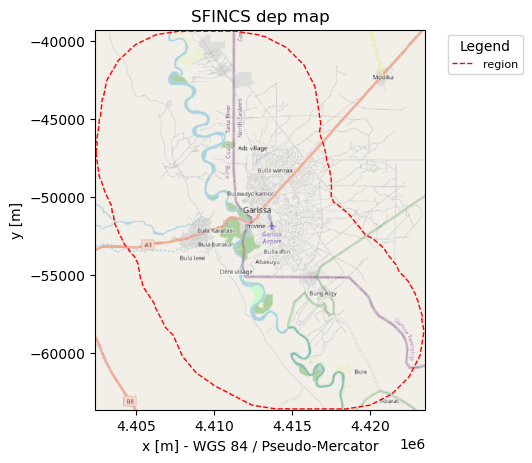

In [3]:
region_path = Path(r"data/1_static/regions/region_garissa_5km_buffer.geojson")

print("Region file found? ", os.path.isfile(region_path))

model.setup_grid_from_region(
    region={"geom":region_path},
    res=50,
    crs="3857",
)

print(model.config)

_ = model.plot_basemap(plot_region=True, bmap="osm")

In [4]:
datasets_dep = [{"elevtn": "srtm30"}]
model.setup_dep(datasets_dep=datasets_dep)

model.setup_mask_active(mask=region_path, zmin=-5, reset_mask=True)

2024-04-11 09:18:50,221 - prepare data catalog - rasterdataset - INFO - Reading srtm30 raster data from c:\Users\pjdeb\OneDrive\Documenten\Universiteit\CT 5\MDP\Git\MDP\SFINCS\data\1_static\srtm30\STRM30DEM_tana.tif


2024-04-11 09:18:50,369 - prepare data catalog - rasterdataset - DEBUG - Clip to [39.548, -0.571, 39.737, -0.353] (epsg:4326))
2024-04-11 09:18:50,895 - prepare data catalog - merge - DEBUG - Reprojection method of first dataset is: average
2024-04-11 09:18:50,907 - prepare data catalog - geodataframe - INFO - Reading  vector data from data\1_static\regions\region_garissa_5km_buffer.geojson
2024-04-11 09:18:50,938 - prepare data catalog - geodataframe - DEBUG - Clip intersects [39.548, -0.571, 39.737, -0.354] (EPSG:4326)
2024-04-11 09:18:50,983 - prepare data catalog - regulargrid - INFO - 0 gaps outside valid elevation range < 10.0 km2.
2024-04-11 09:18:50,988 - prepare data catalog - sfincs - INFO - Derive region geometry based on active cells.
2024-04-11 09:18:51,010 - prepare data catalog - model_api - WARNING - Replacing geom: region


In [5]:
river_len = 100 # km
river_upa = 100 # km2
river_width = 150 # m

model.setup_river_inflow(
    hydrography="merit_hydro", 
    river_len=river_len, 
    river_upa=river_upa, 
    river_width=river_width, 
    keep_rivers_geom=True
)

2024-04-11 09:18:51,049 - prepare data catalog - rasterdataset - INFO - Reading merit_hydro raster data from c:\Users\pjdeb\OneDrive\Documenten\Universiteit\CT 5\MDP\Git\MDP\SFINCS\data\1_static\merit_hydro\{variable}.tif
2024-04-11 09:18:51,081 - prepare data catalog - io - WARNING - nodata value missing for c:\Users\pjdeb\OneDrive\Documenten\Universiteit\CT 5\MDP\Git\MDP\SFINCS\data\1_static\merit_hydro\uparea.tif
2024-04-11 09:18:51,133 - prepare data catalog - io - WARNING - nodata value missing for c:\Users\pjdeb\OneDrive\Documenten\Universiteit\CT 5\MDP\Git\MDP\SFINCS\data\1_static\merit_hydro\flwdir.tif
2024-04-11 09:18:51,188 - prepare data catalog - rasterdataset - DEBUG - Clip to [39.548, -0.571, 39.737, -0.353] (epsg:4326))
2024-04-11 09:18:58,551 - prepare data catalog - sfincs - INFO - Found 2 river inflow points.


2024-04-11 09:18:58,626 - prepare data catalog - regulargrid - DEBUG - outflow (mask=3) boundary cells reset.


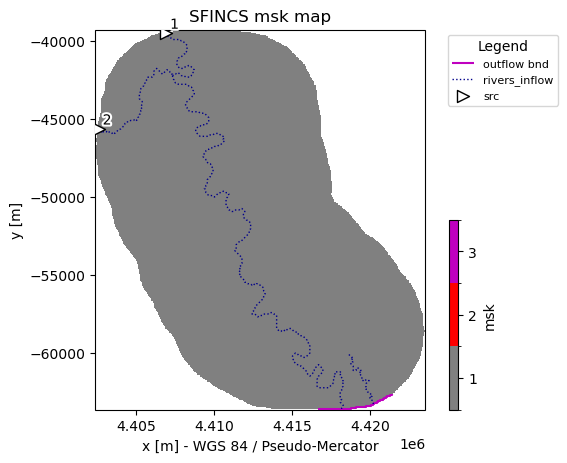

In [6]:
model.setup_mask_bounds(btype="outflow", zmax=135, reset_bounds=True)
# model.setup_mask_bounds(btype="waterlevel", include_mask="osm_coastlines", reset_bounds=True)

fig, ax = model.plot_basemap(variable="msk", plot_bounds=True)

2024-04-11 09:18:59,679 - prepare data catalog - rasterdataset - INFO - Reading srtm30 raster data from c:\Users\pjdeb\OneDrive\Documenten\Universiteit\CT 5\MDP\Git\MDP\SFINCS\data\1_static\srtm30\STRM30DEM_tana.tif
2024-04-11 09:18:59,728 - prepare data catalog - rasterdataset - DEBUG - Clip to [39.548, -0.571, 39.737, -0.353] (epsg:4326))


2024-04-11 09:18:59,742 - prepare data catalog - rasterdataset - INFO - Reading vito raster data from c:\Users\pjdeb\OneDrive\Documenten\Universiteit\CT 5\MDP\Git\MDP\SFINCS\data\1_static\landuse\landuse_vito_tana1.tif
2024-04-11 09:18:59,827 - prepare data catalog - rasterdataset - DEBUG - Clip to [39.548, -0.571, 39.737, -0.353] (epsg:4326))
2024-04-11 09:18:59,832 - prepare data catalog - dataframe - INFO - Reading  csv data from c:\Users\pjdeb\anaconda3\envs\sfincs\lib\site-packages\hydromt_sfincs\data\lulc\vito_mapping.csv


The nodata value None is not in the reclass table.None will be used for the params.


2024-04-11 09:18:59,904 - prepare data catalog - subgrid - INFO - Number of regular cells in a block : 400
2024-04-11 09:18:59,905 - prepare data catalog - subgrid - INFO - Number of blocks in n direction    : 2
2024-04-11 09:18:59,907 - prepare data catalog - subgrid - INFO - Number of blocks in m direction    : 2
2024-04-11 09:18:59,908 - prepare data catalog - subgrid - INFO - Grid size of flux grid            : dx=50.0, dy=50.0
2024-04-11 09:18:59,909 - prepare data catalog - subgrid - INFO - Grid size of subgrid pixels       : dx=10.0, dy=10.0
2024-04-11 09:18:59,911 - prepare data catalog - subgrid - INFO - block 1/4 -- col 0:399 | row 0:399
2024-04-11 09:19:00,826 - prepare data catalog - subgrid - DEBUG - Processing subgrid tables for 117946 active cells..
2024-04-11 09:19:25,025 - prepare data catalog - subgrid - INFO - block 2/4 -- col 0:399 | row 400:485
2024-04-11 09:19:25,283 - prepare data catalog - subgrid - DEBUG - Processing subgrid tables for 19300 active cells..
2024

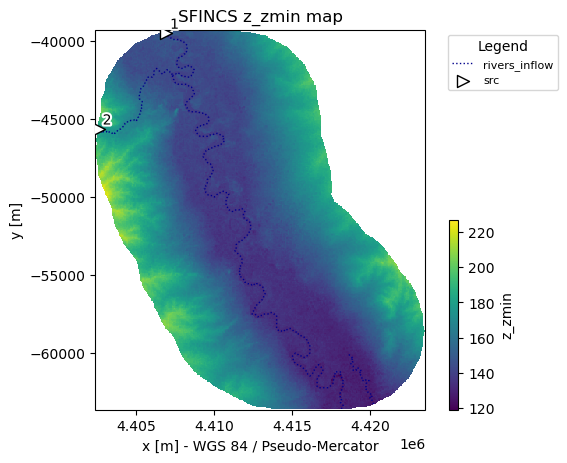

In [7]:
datasets_rgh = [{"lulc": "vito"}]

model.setup_subgrid(
    datasets_dep=datasets_dep,
    datasets_rgh=datasets_rgh,
    # datasets_riv=datasets_riv,
    nr_subgrid_pixels=5,
    write_dep_tif=True,
    write_man_tif=False,
)

# uncomment to see the subgrid table variales
# sf.subgrid

# we can plot the 2D subgrid variables
_ = model.plot_basemap(
    variable="subgrid.z_zmin", plot_bounds=False, zoomlevel=12
)

In [8]:
model.setup_cn_infiltration("gcn250", antecedent_moisture="wet")

2024-04-11 09:19:27,760 - prepare data catalog - rasterdataset - INFO - Reading gcn250 raster data from c:\Users\pjdeb\OneDrive\Documenten\Universiteit\CT 5\MDP\Git\MDP\SFINCS\data\1_static\gcn250\{variable}.tif


2024-04-11 09:19:27,917 - prepare data catalog - rasterdataset - DEBUG - Clip to [39.548, -0.571, 39.737, -0.353] (epsg:4326))


In [19]:
model.setup_config(
    **{
        "tref": "20231001 000000",
        "tstart": "20230801 000000",
        "tstop": "20240101 000000",
    }
)

print(model.config)

2024-04-11 09:39:49,598 - prepare data catalog - model_api - DEBUG - Setting model config options.
{'mmax': 422, 'nmax': 486, 'dx': 50, 'dy': 50, 'x0': 4402410.0, 'y0': -63608.0, 'rotation': 0, 'latitude': 0.0, 'tref': '20231001 000000', 'tstart': '20230801 000000', 'tstop': '20240101 000000', 'tspinup': 60.0, 'dtout': 3600.0, 'dthisout': 600.0, 'dtrstout': 0.0, 'dtmaxout': 86400, 'trstout': -999.0, 'dtwnd': 1800.0, 'alpha': 0.5, 'theta': 1.0, 'huthresh': 0.01, 'manning': 0.04, 'manning_land': 0.04, 'manning_sea': 0.02, 'rgh_lev_land': 0.0, 'zsini': 0.0, 'rhoa': 1.25, 'rhow': 1024.0, 'dtmax': 60.0, 'advection': 1, 'baro': 0, 'pavbnd': 0, 'gapres': 101200.0, 'stopdepth': 100.0, 'crsgeo': 0, 'btfilter': 60.0, 'viscosity': 1, 'inputformat': 'bin', 'outputformat': 'net', 'cdnrb': 3, 'cdwnd': [0.0, 28.0, 50.0], 'cdval': [0.001, 0.0025, 0.0015], 'epsg': 3857, 'mskfile': 'sfincs.msk', 'indexfile': 'sfincs.ind', 'sbgfile': 'sfincs.sbg', 'scsfile': 'sfincs.scs'}


2024-04-11 09:58:48,683 - prepare data catalog - dataframe - DEBUG - Slicing time dime (datetime.datetime(2023, 8, 1, 0, 0), datetime.datetime(2024, 1, 1, 0, 0))
2024-04-11 09:58:48,805 - prepare data catalog - model_api - WARNING - Replacing forcing: dis


<Axes: xlabel='date'>

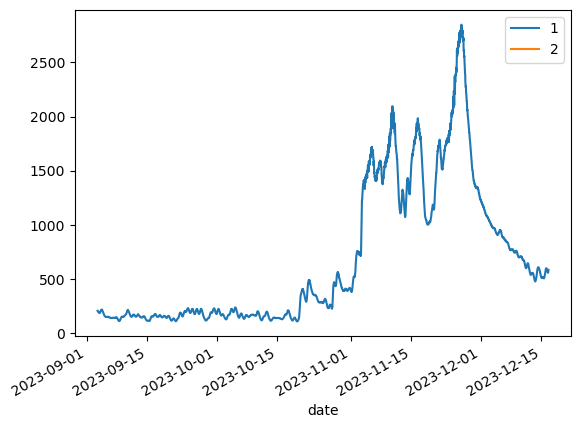

In [45]:
fpath_dis = Path(r"C:/Users/pjdeb/OneDrive/Documenten/Universiteit/CT 5/MDP/data_sens/wra/clean_data_mats/fixed_all_data_Garissa.csv")

discharge_garissa = pd.read_csv(fpath_dis, parse_dates=['date'], index_col='date')
discharge_garissa.index = pd.to_datetime(discharge_garissa.index, format="mixed")

start_date = pd.to_datetime(model.config["tstart"])
end_date = pd.to_datetime(model.config["tstop"])


###############################################################
discharge_garissa = discharge_garissa[(discharge_garissa.index >= start_date) & (discharge_garissa.index <= end_date)]
index = model.forcing["dis"].index
dis = pd.DataFrame(index=discharge_garissa.index, columns=index)

dis[1] = discharge_garissa["discharge[m3/s]"]

model.setup_discharge_forcing(timeseries=dis)
dis.plot()

In [46]:
# index = model.forcing["dis"].index

# dis = np.zeros((len(time), len(index)))



# dis[0:70, 0] = 160
# dis[100:107, 0] = 1800
# dis[107:, 0] = 160

# dispd = pd.DataFrame(index=time, columns=index, data=dis)

# model.setup_discharge_forcing(timeseries=dispd)

# # model.forcing.keys()

# dispd.plot()

In [47]:
model.write()
# Show created files in folder:
dir_list = os.listdir(model.root)
print(dir_list)

2024-04-11 09:59:35,457 - prepare data catalog - sfincs - INFO - Writing model data to c:\Users\pjdeb\OneDrive\Documenten\Universiteit\CT 5\MDP\Git\MDP\SFINCS\model\base_garissa
2024-04-11 09:59:35,459 - prepare data catalog - sfincs - DEBUG - Write binary map indices based on mask.
2024-04-11 09:59:35,481 - prepare data catalog - sfincs - DEBUG - Write binary map files: ['msk', 'dep', 'scs'].
2024-04-11 09:59:35,640 - prepare data catalog - sfincs - INFO - Write raster file(s) for grid to 'gis' subfolder
2024-04-11 09:59:36,187 - prepare data catalog - sfincs - INFO - Write geom files
2024-04-11 09:59:36,188 - prepare data catalog - sfincs - INFO - Write vector file(s) for geoms to 'gis' subfolder
2024-04-11 09:59:36,277 - prepare data catalog - sfincs - INFO - Write forcing files
2024-04-11 09:59:36,339 - prepare data catalog - sfincs - INFO - Write vector file(s) for forcing.dis to 'gis' subfolder
2024-04-11 09:59:36,399 - prepare data catalog - sfincs - WARNING - zsini not in state

In [49]:
fn = model_root.joinpath(r"run.bat")
with open(fn, "r") as f:
    txt = f.read()
print(txt)


cur_dir = os.getcwd()

# uncomment to run sfincs
os.chdir(model_root)
os.system("run.bat")
os.chdir(cur_dir)


fn = model_root.joinpath(r"sfincs_log.txt")
with open(fn, "r") as f:
    txt = f.read()
print(txt)

dir_list = os.listdir(model_root)

# prints all files
pprint(dir_list)

call "C:\Users\pjdeb\OneDrive\Documenten\Universiteit\CT 5\MDP\Git\MDP\SFINCS\SFINCS\SFINCS_v2.0.3_Cauberg_release_exe\sfincs.exe">sfincs_log.txt


 ----------- Welcome to SFINCS -----------

  @@@@@  @@@@@@@ @@ @@  @@   @@@@   @@@@@ 
 @@@ @@@ @@@@@@@ @@ @@@ @@ @@@@@@@ @@@ @@@
 @@@     @@      @@ @@@ @@ @@   @@ @@@    
  @@@@@  @@@@@@  @@ @@@@@@ @@       @@@@@ 
     @@@ @@      @@ @@ @@@ @@   @@     @@@
 @@@ @@@ @@      @@ @@  @@  @@@@@@ @@@ @@@
  @@@@@  @@      @@ @@   @   @@@@   @@@@@ 

              ..............              
          ......:@@@@@@@@:......          
       ..::::..@@........@@.:::::..       
     ..:::::..@@..::..::..@@.::::::..     
    .::::::..@@............@@.:::::::.    
   .::::::..@@..............@@.:::::::.   
  .::::::::..@@............@@..::::::::.  
 .:::::::::...@@.@..@@..@.@@..::::::::::. 
 .:::::::::...:@@@..@@..@@@:..:::::::::.. 
 ............@@.@@..@@..@@.@@............ 
 ^^^~~^^~~^^@@..............@@^^^~^^^~~^^ 
 .::::::::::@@..............@@.::

In [50]:
model.read_results()

print(model.results.keys())

ValueError: Failed to decode variable 'timemax': unable to decode time units 'seconds since 2023-10-01 00:00:00' with 'the default calendar'. Try opening your dataset with decode_times=False or installing cftime if it is not installed.

In [17]:
zs = model.results["zs"]
zsmax = zs.max(dim='time')
 
bed_level =  model.results["zb"].copy()
water_level_max = zsmax - bed_level

# Create quick video
water_level_max = model.results["zs"].copy()

step = 1  # one frame every <step> dtout
cbar_kwargs = {"shrink": 0.6, "anchor": (0, 0)}

def update_plot(i, water_level_max, cax_h):
    water_level_max = water_level_max.isel(time=i)
    t = water_level_max.time.dt.strftime("%d-%B-%Y %H:%M:%S").item()
    ax.set_title(f"SFINCS water depth {t}")
    cax_h.set_array(water_level_max.values.ravel())

fig, ax = model.plot_basemap(
    fn_out=None, variable="", bmap="sat", plot_bounds=False, figsize=(7, 7)
)
cax_h = water_level_max.isel(time=0).plot(
    x="x", y="y", ax=ax, 
    vmin=0.0, vmax=6.0,
    cmap=plt.cm.viridis,
    alpha=0.75, cbar_kwargs=cbar_kwargs)

plt.close()  # to prevent double plot

ani = animation.FuncAnimation(
    fig,
    update_plot,
    frames=np.arange(0, water_level_max.time.size, step),
    interval=250,  # ms between frames
    fargs=(water_level_max, cax_h,),
)

# to show in notebook:
from IPython.display import HTML

HTML(ani.to_html5_video())

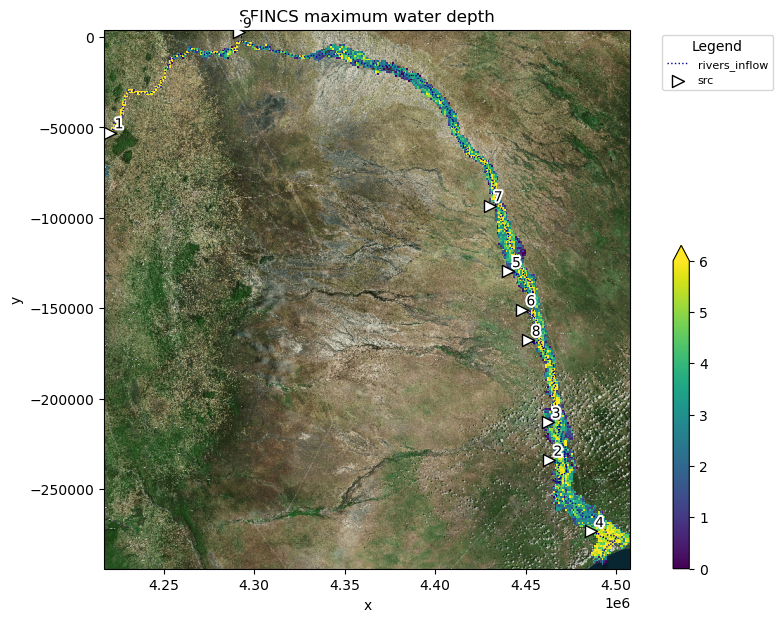

In [16]:
zs = model.results["zs"]
zsmax = zs.max(dim='time')
 
bed_level =  model.results["zb"].copy()
water_level_max = zsmax - bed_level
 
water_level_max
 
# hmax = utils.downscale_floodmap(
#     zsmax=water_level_max,
#     dep=dep, #Use subgrid
#     hmin=hmin,
#     # gdf_mask=gdf_osm,
#     # floodmap_fn=join(sfincs_root, "floodmap.tif") # uncomment to save to <mod.root>/floodmap.tif
# )
 
 
 
fig, ax = model.plot_basemap(
    fn_out=None,
    variable="", # no variable to plot, only basemap
    plot_bounds=False,
    bmap="sat",
    figsize=(11, 7),
    zoomlevel = 12
)
 
 
cbar_kwargs = {"shrink": 0.6, "anchor": (0, 0)}
cax_fld = water_level_max.plot(
    x="x", y="y",
    ax=ax,
    vmin=0.0, vmax=6.0,
    cmap=plt.cm.viridis,
    cbar_kwargs=cbar_kwargs,
)
 
ax.set_title(f"SFINCS maximum water depth")
#plt.savefig(join(scenario_dir, 'hmax.png'), dpi=225, bbox_inches="tight")
plt.show() 